In [1]:
class Accumulator:
    def __init__(self) -> None:
        self.data = {}
    
    def add(self, key, v):
        self.data[key] = v
    
    def __getitem__(self, key):
        return self.data[key]

    def reset(self):
        self.data = {}

In [2]:
a = Accumulator()

In [3]:
a.add('acc', [4, 5])

In [6]:
a['acc']

[4, 5]

# 多项式拟合测试

In [67]:
import numpy as np
import torch
import math
from torch import nn
from torch.utils import data
import matplotlib.pyplot as plt

In [68]:
max_degree = 20
n_train, n_test = 100, 100
true_w = np.zeros(max_degree)
true_w[:4] = [5, 1.2, -3.4, 5.6]
x = np.random.normal(size=(n_train+n_test, 1))
np.random.shuffle(x)
input_x = np.power(x, np.arange(max_degree))
for i in range(max_degree):
    input_x[:,i] /= math.gamma(i+1)
y = input_x.dot(true_w.reshape(-1,1)) + np.random.normal(scale=0.1, size=(input_x.shape[0],1))
true_w, x, input_x, y = [torch.tensor(data, dtype=torch.float32) for data in [true_w, x, input_x, y]]
# input_x = np.concatenate((input_x, y), axis=1)
# np.sum((input_x[:,20].reshape((-1,1))==y))

In [69]:
from d2l.torch import Accumulator

def evaluate_loss(net, data_iter, loss):  #@save
    """评估给定数据集上模型的损失"""
    metric = Accumulator(2)  # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

def train(input_x, n_input, y):
    batch_size = 24
    num_epochs = 10
    lr = 0.1

    train_x = data.TensorDataset(input_x[:n_train,:n_input], y[:n_train,:])
    test_x = data.TensorDataset(input_x[n_train:,:n_input], y[n_train:,:])
    train_iter = data.DataLoader(train_x, batch_size, shuffle=True, num_workers=4)
    test_iter = data.DataLoader(test_x, batch_size, shuffle=True, num_workers=4)
    
    net = nn.Sequential(nn.Linear(n_input, 1))
    def init_weights(m):
        if type == nn.Linear:
            nn.init.normal_(m.weight, std=0.01)
    net.apply(init_weights)
    loss = nn.MSELoss()
    trainer = torch.optim.SGD(net.parameters(), lr=lr)

    data_loss = [[],[]]
    for i in range(num_epochs):
        for x,y in train_iter:
            y_hat = net(x)
            l = loss(y_hat.reshape(y.shape), y)
            trainer.zero_grad()
            l.backward()
            trainer.step()
        train_loss = evaluate_loss(net, train_iter, loss)
        test_loss = evaluate_loss(net, test_iter, loss)
        data_loss[0].append(train_loss)
        data_loss[1].append(test_loss)
        print('epoch:{}, train loss:{}, test loss:{}'.format(i, train_loss, test_loss))
    return data_loss, net

# train

epoch:0, train loss:12.10045952796936, test loss:5.101886940002442
epoch:1, train loss:2.570109415054321, test loss:2.773043668270111
epoch:2, train loss:3.1267041683197023, test loss:1.2560005068778992
epoch:3, train loss:1.0604203462600708, test loss:1.0572627782821655
epoch:4, train loss:0.7170051693916321, test loss:0.6081957936286926
epoch:5, train loss:0.5204081684350967, test loss:0.9962567746639251
epoch:6, train loss:0.5781527042388916, test loss:0.5555744469165802
epoch:7, train loss:0.7840747952461242, test loss:0.883780038356781
epoch:8, train loss:0.6030943214893341, test loss:0.65819553732872
epoch:9, train loss:0.3204646289348602, test loss:0.3344206243753433


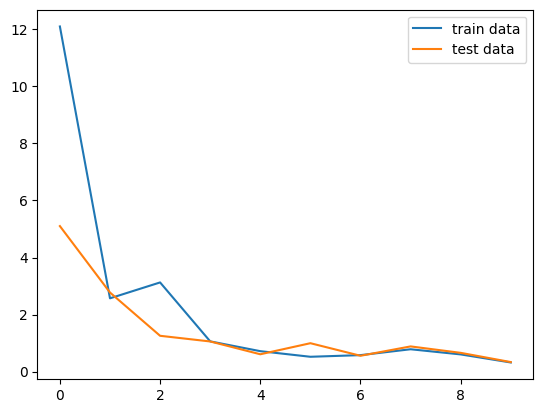

In [70]:
data_loss, net = train(input_x, 20, y)
plt.plot(range(10), data_loss[0], label='train data')
plt.plot(range(10), data_loss[1], label='test data')
plt.legend()

In [50]:
data_loss2 = train(input_x, 2, y)

epoch:0, train loss:7.984483933448791, test loss:28.248069405555725
epoch:1, train loss:15.281001710891724, test loss:23.794523305363125
epoch:2, train loss:7.599284696578979, test loss:25.305301189422607
epoch:3, train loss:7.977235174179077, test loss:24.123488929536606
epoch:4, train loss:6.805777311325073, test loss:22.266724507013958
epoch:5, train loss:6.923137092590332, test loss:22.239731245570713
epoch:6, train loss:7.517506313323975, test loss:23.733210682868958
epoch:7, train loss:7.110881590843201, test loss:22.656419767273796
epoch:8, train loss:6.998449611663818, test loss:21.98243914710151
epoch:9, train loss:6.654173088073731, test loss:22.338515573077732


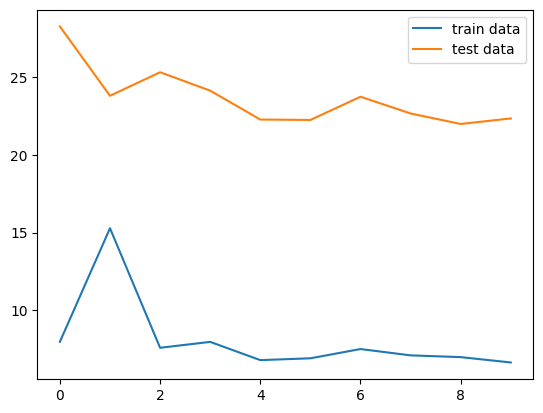

In [51]:
plt.plot(range(10), data_loss2[0], label='train data')
plt.plot(range(10), data_loss2[1], label='test data')
plt.legend()

In [63]:
data_loss3 = train(input_x, 4, y)

epoch:0, train loss:11.123448133468628, test loss:10.151806301540798
epoch:1, train loss:4.499085823694865, test loss:3.6305414968066745
epoch:2, train loss:2.0281339089075723, test loss:1.8229820728302002
epoch:3, train loss:1.2546710471312206, test loss:1.0873113373915355
epoch:4, train loss:0.8657198349634806, test loss:0.7360478937625885
epoch:5, train loss:0.5197111715873083, test loss:0.5091731581423018
epoch:6, train loss:0.45722728470961255, test loss:0.4321445706817839
epoch:7, train loss:0.297114834189415, test loss:0.34237920078966355
epoch:8, train loss:1.3256459633509319, test loss:0.33542829586399925
epoch:9, train loss:0.21986426413059235, test loss:0.4139902401301596


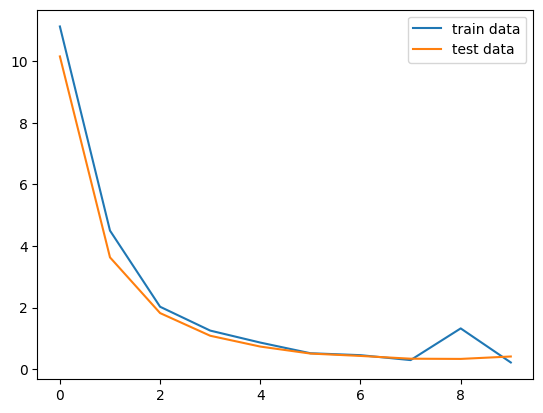

In [66]:
plt.plot(range(10), data_loss3[0][0], label='train data')
plt.plot(range(10), data_loss3[0][1], label='test data')
plt.legend()